## Importing the packages

In [109]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## Importing the News data

In [110]:
news_data = pd.read_csv('./dataset/news.tsv', header=None, sep='\t')
news_data.columns = ["News ID",
                    "Category",
                    "SubCategory",
                    "Title",
                    "Abstract",
                    "URL",
                    "Title Entities",
                    "Abstract Entities"] 
news_data=news_data.iloc[:,:5]
news_data.dropna(inplace=True)
news_data.reset_index(drop=True,inplace=True)

In [111]:
news_data.head()

,News ID,Category,SubCategory,Title,Abstract
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the..."
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re..."


## Visualizing the data

In [112]:
c = news_data[['Category','SubCategory']].value_counts()

In [113]:
index = list()
for i in c.index:
    index.append(np.array(i))
index = np.array(index)
# print(index)

In [114]:
df = pd.DataFrame(columns=['Category','Sub Category', 'Count'])
df['Category'] = index[:,0]
df['Sub Category'] = index[:,1]
df['Count'] = c.values
print(df)

    Category            Sub Category  Count
0       news                  newsus   6309
1     sports            football_nfl   4882
2       news            newspolitics   2760
3       news               newscrime   2120
4    weather       weathertopstories   1878
..       ...                     ...    ...
273     news                  photos      1
274     news               newsvideo      1
275     news             newstvmedia      1
276   health                strength      1
277  finance  finance-auto-insurance      1

[278 rows x 3 columns]


### Category and Sub Category distribution

In [115]:
px.bar(data_frame=df, x='Category', y='Count', color='Sub Category')

In [116]:
# px.scatter_3d(data_frame=df, x='Category', y='Sub Category', z='Values', color='Sub Category')  # visualization not so clear

### Title length distribution

In [117]:
title_length = list()
for i in news_data['Title']:
    title_length.append(len(i))
px.histogram(title_length, color=news_data['Category'])

### Word cloud - What are the most popular words in the titles of a particular Category?
- Category : news

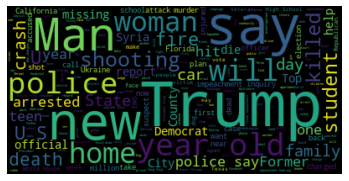

In [118]:
text = ''
for i in news_data[news_data['Category'] == 'news']['Title']:
    text = text + i + ' '

# Make the figure
wordcloud = WordCloud().generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Importing the behaviors data

In [119]:
behaviors_data = pd.read_csv('./dataset/behaviors.tsv', header=None, sep='\t')
behaviors_data.columns = ["Impression ID",
                    "User ID",
                    "Time",
                    "History",
                    "Impressions"] 

In [120]:
behaviors_data.dropna(inplace=True)
behaviors_data.reset_index(drop=True,inplace=True)

In [121]:
behaviors_data.head(5)

,Impression ID,User ID,Time,History,Impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...


In [122]:
len_history = []
for i in range(len(behaviors_data)):
    len_history.append(len(behaviors_data['History'][i].split(' ')))
behaviors_data['Number of history'] = len_history
behaviors_data.head(5)

,Impression ID,User ID,Time,History,Impressions,Number of history
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0,9
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...,82
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...,16
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0,10
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...,4


In [124]:
category_history = []
sub_category_history = []
for i in range(len(behaviors_data)):
    history_list = behaviors_data['History'][i].split(' ')
    temp = ' '.join(news_data[news_data['News ID'].isin(history_list)]['Category'])
    category_history.append(temp)

    temp = ' '.join(news_data[news_data['News ID'].isin(history_list)]['SubCategory'])
    sub_category_history.append(temp)

    if i%10000==0:
        print(i)

behaviors_data['History category']=category_history
behaviors_data['History subcategory']=sub_category_history

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000


In [125]:
behaviors_data.head(5)

,Impression ID,User ID,Time,History,Impressions,Number of history,History category,History subcategory
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0,9,news lifestyle tv sports news movies tv news s...,newspolitics lifestylebuzz tvnews baseball_mlb...
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...,82,foodanddrink news news news sports news news t...,restaurantsandnews newscrime newsus newsus box...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...,16,lifestyle lifestyle sports tv news lifestyle f...,lifestylehomeandgarden lifestylebuzz football_...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0,10,finance tv lifestyle sports video sports finan...,markets tv-celebrity lifestylebuzz basketball_...
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...,4,travel autos weather health,travelnews autosownership weathertopstories we...


In [126]:
behaviors_data.to_csv('behaviors1.csv', index=False, header=True )

In [127]:
behaviors_data['Time']

0          11/11/2019 9:05:58 AM
1          11/12/2019 6:11:30 PM
2          11/14/2019 7:01:48 AM
3          11/11/2019 5:28:05 AM
4          11/12/2019 4:11:21 PM
                   ...          
153722    11/14/2019 10:24:05 PM
153723     11/13/2019 6:57:04 AM
153724    11/14/2019 10:58:13 AM
153725     11/13/2019 2:57:02 PM
153726     11/14/2019 3:25:49 PM
Name: Time, Length: 153727, dtype: object

In [128]:
time = []
for i in range(len(behaviors_data)):
    #len_history.append(len(behaviors_data['History'][i].split(' ')))
    hour = int(behaviors_data['Time'][i].split(' ')[1].split(':')[0])
    ap = behaviors_data['Time'][i].split(' ')[2]
    if 6 <= hour < 12 and ap == 'AM': # Morning
        t = 'Morning'
    if 0 <= hour < 6 and ap == 'PM': # Afternoon
        t = 'Afternoon'
    if 6 <= hour < 12 and ap == 'PM': # Evening
        t = 'Evening'
    if 0 <= hour < 6 and ap == 'AM': # Night
        t = 'Night' 

    time.append(t)

behaviors_data['Time category'] = time

In [129]:
behaviors_data[behaviors_data['User ID'] == 'U13740']['Impressions']

0                                         N55689-1 N35729-0
34577     N20020-0 N3737-0 N43202-0 N18708-0 N30125-0 N3...
151651    N13907-0 N8509-0 N47061-0 N51048-0 N22417-0 N3...
Name: Impressions, dtype: object

In [130]:
impressions = dict()
for i in range(len(behaviors_data)):
     
    user_id = behaviors_data['User ID'][i]
    
    temp = ('-'.join(behaviors_data['Impressions'][i].split(' '))).split('-')[1::2]
    i_list = list(map(int, temp))

    if user_id in impressions.keys():
        impressions[user_id] = impressions[user_id] + i_list
    else:
        impressions[user_id] = i_list

In [131]:
impressions_rate = list()
for i in range(len(behaviors_data)):
     
    user_id = behaviors_data['User ID'][i]
    
    impressions_rate.append(sum(impressions[user_id])/len(impressions[user_id]))
behaviors_data['Impressions_rate'] = impressions_rate

In [132]:
behaviors_data.head(5)

,Impression ID,User ID,Time,History,Impressions,Number of history,History category,History subcategory,Time category,Impressions_rate
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0,9,news lifestyle tv sports news movies tv news s...,newspolitics lifestylebuzz tvnews baseball_mlb...,Morning,0.009494
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...,82,foodanddrink news news news sports news news t...,restaurantsandnews newscrime newsus newsus box...,Evening,0.051282
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...,16,lifestyle lifestyle sports tv news lifestyle f...,lifestylehomeandgarden lifestylebuzz football_...,Morning,0.045455
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0,10,finance tv lifestyle sports video sports finan...,markets tv-celebrity lifestylebuzz basketball_...,Night,0.142857
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...,4,travel autos weather health,travelnews autosownership weathertopstories we...,Afternoon,0.014493


In [133]:
behaviors_data.to_csv('behaviors2.csv', index=False, header=True )

In [134]:
behaviors_data.head(5)

,Impression ID,User ID,Time,History,Impressions,Number of history,History category,History subcategory,Time category,Impressions_rate
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0,9,news lifestyle tv sports news movies tv news s...,newspolitics lifestylebuzz tvnews baseball_mlb...,Morning,0.009494
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...,82,foodanddrink news news news sports news news t...,restaurantsandnews newscrime newsus newsus box...,Evening,0.051282
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...,16,lifestyle lifestyle sports tv news lifestyle f...,lifestylehomeandgarden lifestylebuzz football_...,Morning,0.045455
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0,10,finance tv lifestyle sports video sports finan...,markets tv-celebrity lifestylebuzz basketball_...,Night,0.142857
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...,4,travel autos weather health,travelnews autosownership weathertopstories we...,Afternoon,0.014493


## Visualizing the data

### Distribution of the number of history

In [135]:
hist_count = behaviors_data['Number of history'].value_counts()
hist_df = pd.DataFrame(columns=['Num of history', 'Count'])
hist_df['Num of history'] = hist_count.index
hist_df['Count'] = hist_count.values

In [136]:
num = 0
for i in range(len(hist_df)):
    num = num + hist_df['Count'][i]*hist_df['Num of history'][i]
mean = num/sum(hist_df['Count'])
fig = go.Figure()
fig.add_trace(go.Bar(x=hist_df['Num of history'], y=hist_df['Count']))
fig.add_shape(go.layout.Shape(type='line', xref='x', yref='paper',
                        x0=mean, y0=0, x1=mean, y1=0.5, line={'dash': 'dash'}),)
fig.add_annotation(x=mean, y=3500, text='Mean', showarrow=True, arrowhead=1)
fig.update_layout(xaxis_title='The number of history', yaxis_title='Count')

### Timing preference

In [138]:
count_time = behaviors_data['Time category'].value_counts()
print(count_time)

Morning      74462
Afternoon    40125
Night        21167
Evening      17973
Name: Time category, dtype: int64


In [142]:
go.Figure(data=[go.Pie(labels=count_time.index, values=count_time.values)])

In [204]:
bins = np.arange(start=0, stop=1, step=0.05)
behaviors_data['Binned impression'] = pd.cut(behaviors_data['Impressions_rate'], bins)
behaviors_data.head()
# px.scatter(data_frame=behaviors_data, x='Impressions_rate')

,Impression ID,User ID,Time,History,Impressions,Number of history,History category,History subcategory,Time category,Impressions_rate,binned,Binned impression
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0,9,news lifestyle tv sports news movies tv news s...,newspolitics lifestylebuzz tvnews baseball_mlb...,Morning,0.009494,"(0.0, 0.05]","(0.0, 0.05]"
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...,82,foodanddrink news news news sports news news t...,restaurantsandnews newscrime newsus newsus box...,Evening,0.051282,"(0.05, 0.1]","(0.05, 0.1]"
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...,16,lifestyle lifestyle sports tv news lifestyle f...,lifestylehomeandgarden lifestylebuzz football_...,Morning,0.045455,"(0.0, 0.05]","(0.0, 0.05]"
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0,10,finance tv lifestyle sports video sports finan...,markets tv-celebrity lifestylebuzz basketball_...,Night,0.142857,"(0.1, 0.15]","(0.1, 0.15]"
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...,4,travel autos weather health,travelnews autosownership weathertopstories we...,Afternoon,0.014493,"(0.0, 0.05]","(0.0, 0.05]"


In [197]:
# behaviors_data.groupby(pd.cut(behaviors_data['Impressions_rate'], bins=bins)).size()
count_imp = behaviors_data[['Binned impression','Time category']].value_counts()
index_imp = list()
for j in count_imp.index:
    index_imp.append(np.array(j))
index_imp = np.array(index_imp)
# print(index_imp)

In [208]:
imp_df = pd.DataFrame(columns=['Binned impression','Time Category','Count','Binned index'])
imp_df['Binned impression'] = index_imp[:,0]
imp_df['Time Category'] = index_imp[:,1]
imp_df['Count'] = count_imp.values
imp_df = imp_df[imp_df['Count'] > 0]
imp_df = imp_df.sort_values(by=['Binned impression'])
imp_df = imp_df.reset_index(drop=True)
for k in imp_df['Binned impression']:
    # print(k)
    if str(k) == '(0.0, 0.05]':
        bin_category = 0
    elif str(k) == '(0.05, 0.1]':

# imp_df.head()
# print(type(imp_df['Binned impression'][1]))

(0.0, 0.05]
(0.0, 0.05]
(0.0, 0.05]
(0.0, 0.05]
(0.05, 0.1]
(0.05, 0.1]
(0.05, 0.1]
(0.05, 0.1]
(0.1, 0.15]
(0.1, 0.15]
(0.1, 0.15]
(0.1, 0.15]
(0.15, 0.2]
(0.15, 0.2]
(0.15, 0.2]
(0.15, 0.2]
(0.2, 0.25]
(0.2, 0.25]
(0.2, 0.25]
(0.2, 0.25]
(0.25, 0.3]
(0.25, 0.3]
(0.25, 0.3]
(0.25, 0.3]
(0.3, 0.35]
(0.3, 0.35]
(0.3, 0.35]
(0.3, 0.35]
(0.35, 0.4]
(0.35, 0.4]
(0.35, 0.4]
(0.35, 0.4]
(0.4, 0.45]
(0.4, 0.45]
(0.4, 0.45]
(0.4, 0.45]
(0.45, 0.5]
(0.45, 0.5]
(0.45, 0.5]
(0.45, 0.5]
(0.55, 0.6]
(0.65, 0.7]
(0.65, 0.7]


In [209]:
# fig2 = px.scatter(imp_df, x='Binned impression', y='Count',facet_col='Time Category')
# fig2.show()